In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = base.classes.measurement
Stations = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
#import inspector to the first box for more accurate query from 'measurement' table
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Find the most recent date in the data set by querying the date, sort in descending order, and choosing the first 
latest_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
latest_date

('2017-08-23',)

<Axes: xlabel='date', ylabel='inches'>

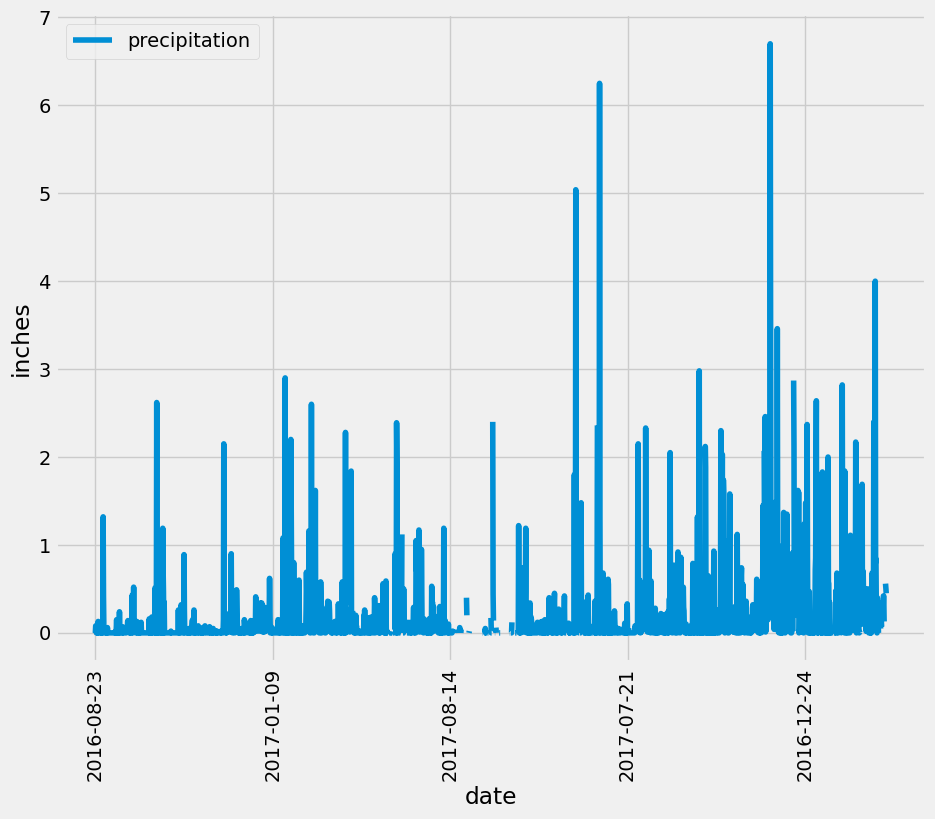

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
first_date = dt.date(2017, 8 , 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= first_date).all()
prcp_query

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_query, columns = ['date', 'precipitation'])

# Sort the dataframe by date
df.set_index('date', inplace = True)
df.sort_values(by='date')
df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, xlabel='date', ylabel = 'inches', figsize = (10, 8))



In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Stations.station)).first()[0]
station_count

9

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurements.tobs)).filter(Measurements.station == 'USC00519281').first()
max_temp = session.query(func.max(Measurements.tobs)).filter(Measurements.station == 'USC00519281').first()
avg_temp = session.query(func.avg(Measurements.tobs)).filter(Measurements.station == 'USC00519281').first()


(71.66378066378067,)

Text(0.5, 0, 'Temperature')

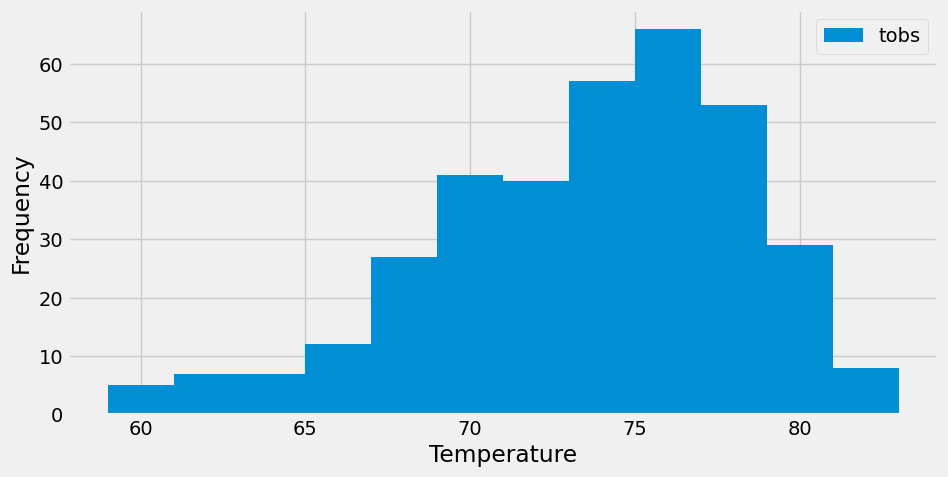

In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurements.tobs).\
        filter(Measurements.station == 'USC00519281').\
        filter(Measurements.date >= first_date).all()
station_df = pd.DataFrame(data, columns =['tobs'])
station_df.plot.hist(bins=12, figsize=(10, 5))
plt.xlabel('Temperature')


# Close Session

In [55]:
# Close Session
session.close()